
# 👀 Check your SMARTS

Here you can try various SMARTS patterns and check if they are "triggered" (highlighted) in the test structure. 

By Filip Stefaniak fstefaniak@iimcb.gov.pl

In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.molSize = (400, 400)

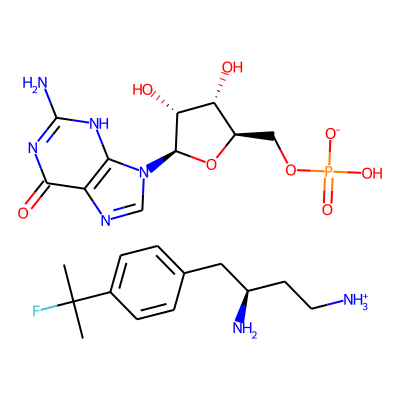

In [47]:
# here provide the SMILES for the test molecule(s). If you don't have a better idea, leave as it is
# testing_molecule = 'NC(CC(F)C(O)=O)C(CCCl)C1=CC=C(F)N=C1.NC1=NC2=C(N=CN2[C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)C(=O)N1'
testing_molecule = 'CC(C)(F)c1ccc(cc1)C[C@H](N)CC[NH3+].[H]O[C@@]1([H])[C@@]([H])(O[C@]([H])(C([H])([H])OP(O)([O-])=O)[C@@]1([H])O[H])n1c([H])nc2c1n([H])c(nc2=O)N([H])[H]'

# draw a testing molecule (sote)
m = Chem.MolFromSmiles(testing_molecule)

# add explicit hydrogens (optional)
# m = Chem.AddHs(m)

m

Activated for these atoms:  ((12,), (16,), (19,), (22,), (24,), (25,), (26,), (28,), (31,), (36,), (38,), (39,))


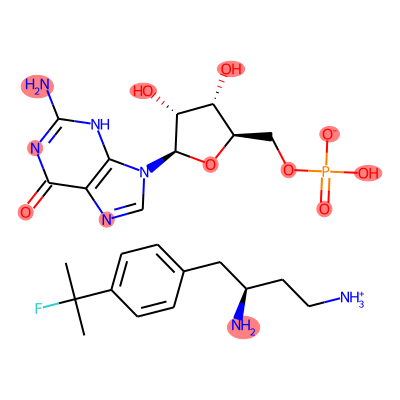

In [46]:
# Various SMARTS patterns to play with

hba = "[!$([#6,F,Cl,Br,I,o,s,nX3,#7v5,#15v5,#16v4,#16v6,*+1,*+2,*+3])]"  # from daylight.com
hba2 = "[$([O;H0;$(O=C-[NH2])])]"
hbd3 = "[!H0;#7,#8,#9]"  # hydrogen-bond donor
hbd3 = '[N!H0v3,N!H0+v4,OH+0,SH+0,nH+0]'
weak_hbd = '[#6!H0]'

carbonyl_oxygen = '[$([OH0]=[CX3,c]);!$([OH0]=[CX3,c]-[OH,O-])]'
carbonyl_carbon = '[$([CX3,c]=[OH0]);!$([CX3,c](=[OH0])-[OH,O-])]'

halogen_with_carbon = "[F,Cl,Br,I;X1;$([F,Cl,Br,I]-[#6])]"
carbon_with_halogen = "[#6;$([#6]-[F,Cl,Br,I])]"


HBDhydrogens = "[$([#1][!H0;#7,#8,#9])]"


polar_test_hba = "[!$([#1,#6,F,Cl,Br,I,o,s,nX3,#7v5,#15v5,#16v4,#16v6,*+1,*+2,*+3])]"
polar_test_hbd = "[N!H0v3,N!H0+v4,OH+0,SH+0,nH+0]"


weak_polar_hba = "[!$([#1,#6,F,Cl,Br,I,o,s,nX3,#7v5,#15v5,#16v4,#16v6,*+1,*+2,*+3])]"

C_H = "[#1;$([#1]-[C])]" # hydrogens connected to carbon

carbonyl = "[CX3]=[OX1]"

#
# highlight the pattern
#

smarts_pattern_to_test  = halogen_with_carbon # you can replace halogen_with_carbon with any defined interactions as above or a variable with your own SMARTs

# draw the molecule...
m = Chem.MolFromSmiles(testing_molecule)

# add explicit hydrogens (optional)
# m = Chem.AddHs(m)


# ... and highlight desired atoms
substructure = Chem.MolFromSmarts(polar_test_hba)

print("Activated for these atoms: ", m.GetSubstructMatches(substructure))

m